steps of a genetic algorithm:

initialization
evaluation
elitism
parent selection
reproduction
mutation

candlestick based genalg params:
modify these based off of largely expanded featurespace

popsize - 200
num gens - 9
elitism copys - 1
mutation prob - 5%
fresh pattern prob - 2%
min number of patterns - 2.5%

In [1]:
import _09_utility as util

dataset = util.load_large_csv('spx_features.csv')


Trying to load CSV file into DataFrame...
loaded chunk 1 of size: 103800164
loaded chunk 2 of size: 103800164
loaded chunk 3 of size: 103800164
loaded chunk 4 of size: 103800164
loaded chunk 5 of size: 103800164
loaded chunk 6 of size: 103800164
loaded chunk 7 of size: 103800164
loaded chunk 8 of size: 103800164
loaded chunk 9 of size: 103800164
loaded chunk 10 of size: 103800164
loaded chunk 11 of size: 103800164
loaded chunk 12 of size: 103800164
loaded chunk 13 of size: 103800164
loaded chunk 14 of size: 92415380
concat chunks
concatted chunks
Success.
Size of dataset:	1441815380


In [ ]:
fssr = util.fn_all_subsets(True,0,True)
fssd = util.fnsubset_to_indexdictlist(dataset.columns,fssr)
fss = []
for d in fssd:
    fss.append(list(d.keys()))
print(fss)
dataset = dataset.values
arr_low = dataset[:,1]
arr_close = dataset[:,2]

arr_low.shape

[[0, 1, 2, 4, 3, 5, 6, 151, 152, 153], [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66], [67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126], [127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150], [154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212], [213, 214, 215, 216, 217, 218, 219

In [72]:
from importlib import reload
import _01_initialization as _1
import _02_evaluation as _2
reload(_10)
import _10_era as _10

log_normalize = True
lag_allowance = 30
generations = 5
hold_for = 15
criteria = 'mkr'
elite_criteria = 1
num_parents = 10
rep_mode = 'exponential'
part_mproba = 0.000
ptrn_mproba = 0.000

arr_returns, arr_kratio = _1.collect_parallel_metrics(
	arr_close=arr_close,
	arr_low=arr_low,
	hold_for=hold_for,
	lag_allow=lag_allowance,
	log_normalize=log_normalize
)

num_eras = 10
era_elites = []

for era in range(num_eras):
	new_population = _1.generate_initial_population(
		sample_size=150,
		pattern_size=2,
		feat_idx_pool=fss,
		lag_allowance=lag_allowance,
		skew_lag_prob=False
	)

	endera = _10.era(
		era_num		=	era,
		new_population	=	new_population,
		generations	=	generations,
		dataset		=	dataset,
		fss			=	fss,
		criteria	=	criteria,
		log_normalize	=	log_normalize,
		hold_for	=	hold_for,
		lag_allowance	=	lag_allowance,
		arr_close	=	arr_close,
		arr_low		=	arr_low,
		arr_returns	=	arr_returns,
		arr_kratio	=	arr_kratio,
		elite_criteria = 1,
		num_parents = 4,
		rep_mode = 'exponential',
		part_mproba = 0.000,
		ptrn_mproba = 0.000,
		use_strict_filter	=	True,
		strict_filter_kwargs	=	{
			'avg_return':(0.60 / 25000),
			'tot_return':0.25,
			'profit_factor':0.5,
			'kelsch_ratio':2.0,
			'entry_frequency':0.01
		}
	)

	endera = _2.sort_population(endera,criteria)
	era_elites.append(endera[0])


325000 ERA 1 GEN 1 (mkr): AVG 0.82074, BEST 1.2984, FROM 2 GENES.
pattern pool len = 2
combo len = 1
325000 ERA 1 GEN 2 (mkr): AVG 1.2984, BEST 1.2984, FROM 2 GENES.
pattern pool len = 2
combo len = 1
325000 ERA 1 GEN 3 (mkr): AVG 1.2984, BEST 1.2984, FROM 2 GENES.
pattern pool len = 2
combo len = 1
325000 ERA 1 GEN 4 (mkr): AVG 1.2984, BEST 1.2984, FROM 2 GENES.
pattern pool len = 2
combo len = 1
325000 ERA 1 GEN 5 (mkr): AVG 1.2984, BEST 1.2984, FROM 2 GENES.
pattern pool len = 2
combo len = 1
325000 ERA 2 GEN 1 (mkr): AVG 0.58095, BEST 0.58095, FROM 1 GENES.
pattern pool len = 2
combo len = 1
325000 ERA 2 GEN 2 (mkr): AVG 0.58095, BEST 0.58095, FROM 2 GENES.
pattern pool len = 2
combo len = 1
325000 ERA 2 GEN 3 (mkr): AVG 0.58095, BEST 0.58095, FROM 2 GENES.
pattern pool len = 2
combo len = 1
325000 ERA 2 GEN 4 (mkr): AVG 0.58095, BEST 0.58095, FROM 2 GENES.
pattern pool len = 2
combo len = 1
325000 ERA 2 GEN 5 (mkr): AVG 0.58095, BEST 0.58095, FROM 2 GENES.
pattern pool len = 2
com

In [73]:
endtime = _10.era(
		era_num	=	0,
		new_population	=	era_elites,
		generations	=	10,
		dataset		=	dataset,
		fss			=	fss,
		criteria	=	criteria,
		log_normalize	=	log_normalize,
		hold_for	=	hold_for,
		lag_allowance	=	lag_allowance,
		arr_close	=	arr_close,
		arr_low		=	arr_low,
		arr_returns	=	arr_returns,
		arr_kratio	=	arr_kratio,
		elite_criteria = 1,
		num_parents = 4,
		rep_mode = 'exponential',
		part_mproba = 0.000,
		ptrn_mproba = 0.000,
		use_strict_filter	=	True,
		strict_filter_kwargs	=	{
			'avg_return':(1.00 / 25000),
			'tot_return':0.25,
			'profit_factor':0.5,
			'kelsch_ratio':2.0,
			'entry_frequency':0.01
		}
)

325000 ERA 1 GEN 1 (mkr): AVG 0.68629, BEST 0.82356, FROM 6 GENES.
pattern pool len = 6
combo len = 15
325000 ERA 1 GEN 2 (mkr): AVG 0.65581, BEST 0.82356, FROM 6 GENES.
pattern pool len = 6
combo len = 15
325000 ERA 1 GEN 3 (mkr): AVG 0.74777, BEST 0.89726, FROM 9 GENES.
pattern pool len = 5
combo len = 10
325000 ERA 1 GEN 4 (mkr): AVG 0.7446, BEST 0.89726, FROM 7 GENES.
pattern pool len = 5
combo len = 10
325000 ERA 1 GEN 5 (mkr): AVG 0.80727, BEST 0.89726, FROM 7 GENES.
pattern pool len = 3
combo len = 3
325000 ERA 1 GEN 6 (mkr): AVG 0.79989, BEST 0.89726, FROM 4 GENES.
pattern pool len = 4
combo len = 6
325000 ERA 1 GEN 7 (mkr): AVG 0.81937, BEST 0.89726, FROM 5 GENES.
pattern pool len = 3
combo len = 3
325000 ERA 1 GEN 8 (mkr): AVG 0.87269, BEST 0.89726, FROM 3 GENES.
pattern pool len = 2
combo len = 1
325000 ERA 1 GEN 9 (mkr): AVG 0.89726, BEST 0.89726, FROM 2 GENES.
pattern pool len = 2
combo len = 1
325000 ERA 1 GEN 10 (mkr): AVG 0.89726, BEST 0.89726, FROM 2 GENES.
pattern poo

In [31]:
print(len(endera))

57


In [74]:
import _00_gene as _0
import _02_evaluation as _2
import _09_utility as  util
reload(_0)
reload(util)
reload(_2)

print(_2.show_best_gene_patterns(endtime,criteria,fssd))

(440)lolo240_spx[27] > (437)lolo30_spx[0]
(423)hihi5_spx[12] < (423)hihi5_spx[6]
Profit Factor: 1.1954
Average Return: 4e-05 (~0.21 on /MES == $1.05)
Average KRatio: 6.89096
MKR: 0.8972606697868634
Frequency: 0.05264385557712133
Hold For: -1


347258
347258


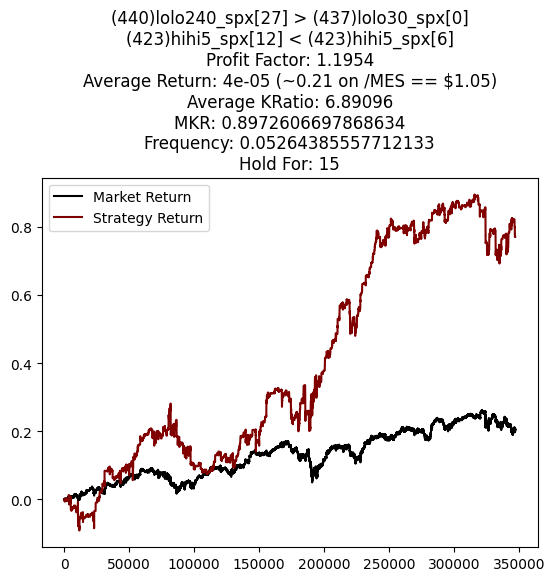

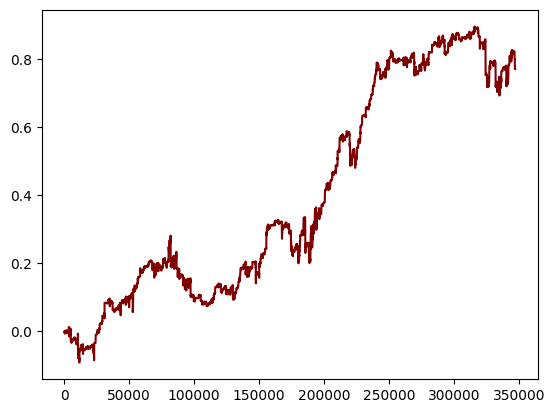

In [75]:
reload(_0)
reload(_2)
endera = _2.sort_population(endera,criteria)
_2.show_returns(endtime[0]._array_returns, arr_close=arr_close, gene_kwargs={"population":endtime,"criteria":criteria,"fss":fssd,"hold_for":hold_for})

In [ ]:
import _00_gene as _0
import _05_reproduction as _5


g1 = _0.Gene()
g1.custom(
	fss=fssd,
    acceptable_lag=list(range(30)),
    pattern_vals=[
        (0, 0, 'lt', 0, 0),
        (0, 0, 'lt', 0, 0)
	]
)

